In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
colors = ['r','g','b','c','m','y']
palette = {0:'red', 1:'green', 2:'blue', 3:'cyan', 4:'violet', 5:'yellow'}

Create a random Dataset

In [ ]:
x, y = make_blobs(n_samples=400, centers=3, random_state=20, cluster_std=1.1)
data = pd.DataFrame(data=x, columns=['feature1', 'feature2'])
data.head()

,feature1,feature2
0,7.573167,6.035839
1,1.858117,5.187385
2,1.779835,8.949401
3,-8.635562,5.550363
4,0.587121,8.934064


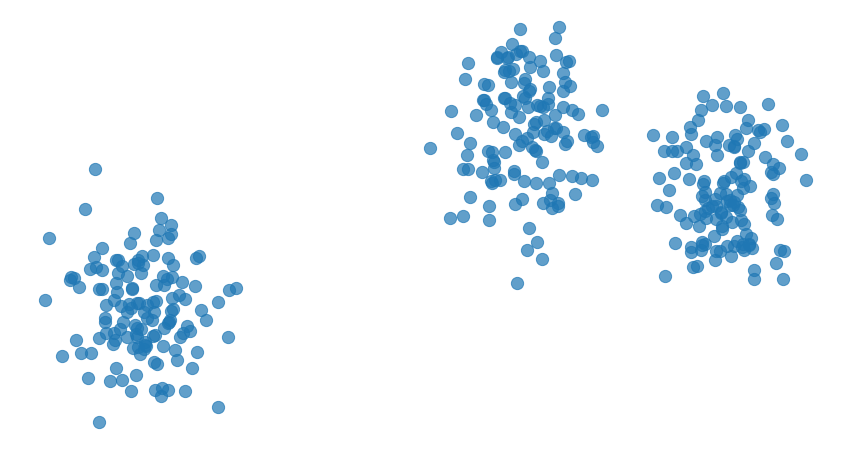

In [ ]:
fig = plt.figure(figsize=(15,8))

plt.scatter(x=data.feature1, y=data.feature2,
            alpha=0.7, s=150)

ax = fig.get_axes()[0]
ax.set_axis_off()
plt.show()

Randomly Initialize the number of centroids

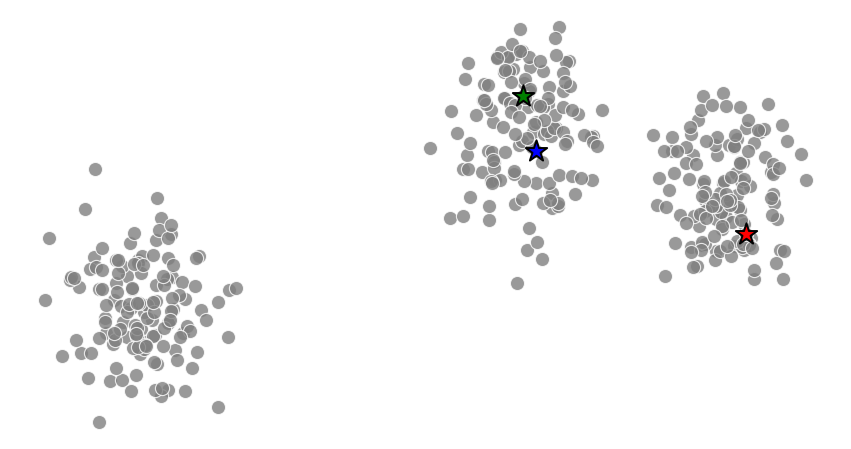

In [ ]:
centroids = []

def centroid_init(data, ncentroid, figure=True):
    
    centroids.clear()
    
    random_index = random.sample(range(0, data.shape[0]), ncentroid)
    for i, index in enumerate(random_index):
            centroids.append(data.iloc[index].values.tolist()) 
            
    if figure == True:
        
        fig = plt.figure(figsize=(15,8))
        sns.scatterplot(x=data.feature1, y=data.feature2,
                    alpha=0.8, s=200, color='grey')   
        for i in range(len(centroids)):   
            plt.scatter(x=centroids[i][0], y=centroids[i][1], marker='*', s=500, color=colors[i], linewidth=2, edgecolor='k')
        ax = fig.get_axes()[0]
        ax.set_axis_off()
        plt.show()
    
centroid_init(data, 3)

Measure the diatance (Euclidean Distance) between each point and the centroid

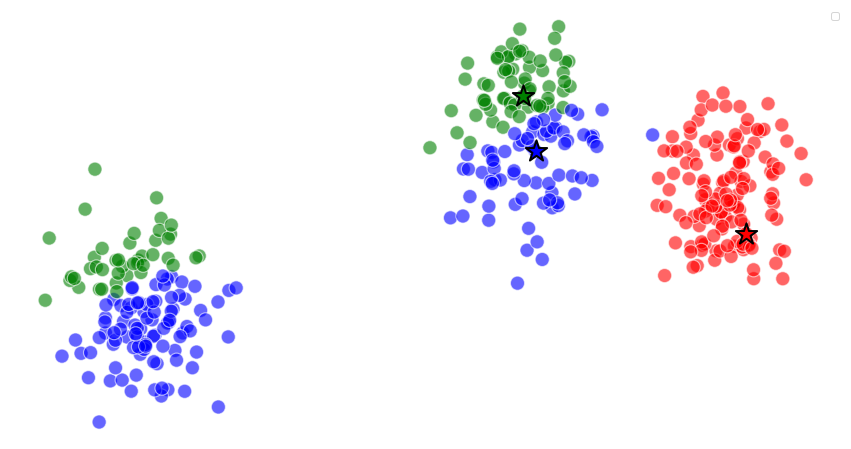

In [ ]:
cluster = []
euclidean_distance = []

def euclidean_distance_func(figure=True):
    
    cluster.clear()
    euclidean_distance.clear()
    
    for i in range(data.shape[0]):
        x = []
        for centroid in centroids:
            x.append(np.sqrt(np.dot(data.iloc[i].values-centroid, data.iloc[i].values-centroid)))
        euclidean_distance.append(x)
        group = euclidean_distance[i].index(min(euclidean_distance[i]))
        cluster.append(group)
     
    if figure == True:
        fig = plt.figure(figsize=(15,8))
        sns.scatterplot(x=data.feature1, y=data.feature2,
                        alpha=0.6, s=200, hue=cluster, palette=palette)
        for i, centroid in enumerate(centroids):
            plt.scatter(x=centroid[0], y=centroid[1], marker='*', s=500, color=colors[i], linewidth=2, edgecolor='k')
        ax = fig.get_axes()[0]
        ax.set_axis_off()    
        plt.legend([])
        plt.show()
            
euclidean_distance_func()

Calculate the mean of each cluster and update the centroid with mean of each cluster

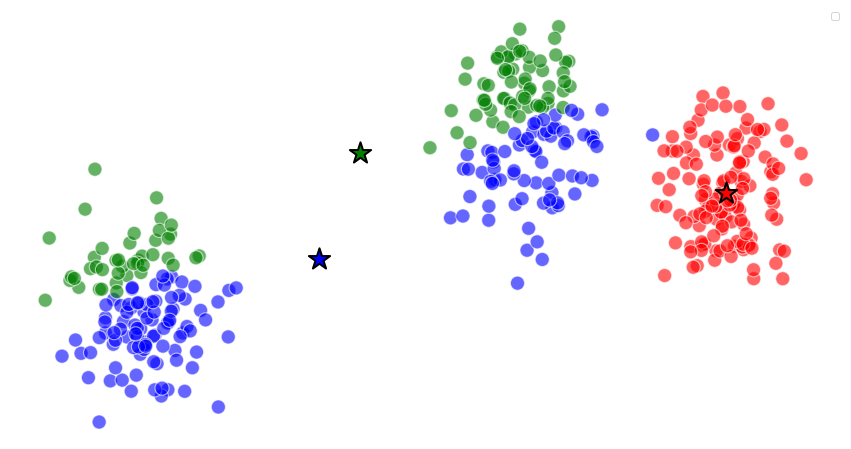

In [ ]:
new_centroids = []

def move_centroids(figure=True):
    
    new_centroids.clear()
    
    for i in np.unique(cluster):
        df = data[np.array(cluster) == i]
        centroid = [df.feature1.mean(), df.feature2.mean()]
        new_centroids.append(centroid)   
        
    if figure == True:
        fig = plt.figure(figsize=(15,8))
        sns.scatterplot(x=data.feature1, y=data.feature2,
                        alpha=0.6, s=200, hue=cluster, palette=palette)
        for i, centroid in enumerate(new_centroids):
            plt.scatter(x=centroid[0], y=centroid[1], marker='*', s=500, color=colors[i], linewidth=2, edgecolor='k')
        ax = fig.get_axes()[0]
        ax.set_axis_off()    
        plt.legend([])
        plt.show()
        
move_centroids()

Repeat step 2 and 3 with new centroids untill i) convergence (No further changes in the centroids), ii) Maximum number of iterations.

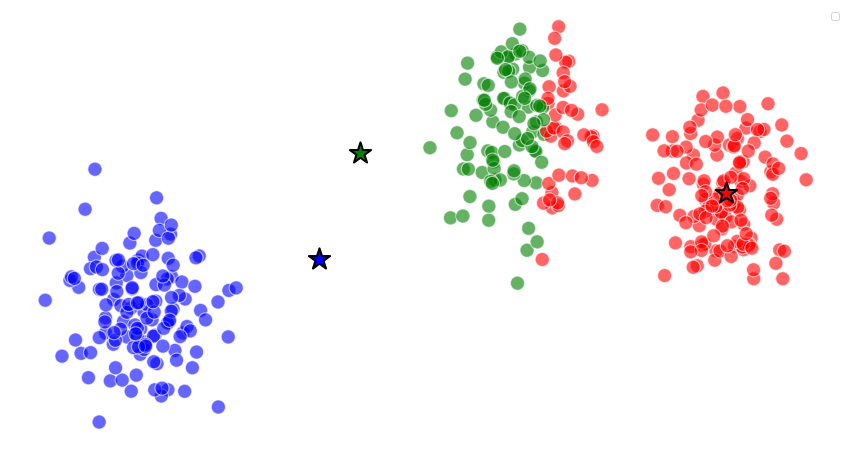

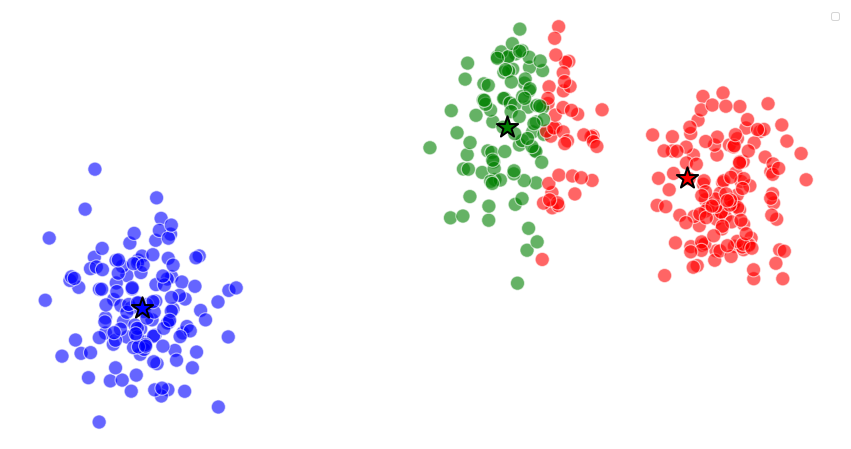

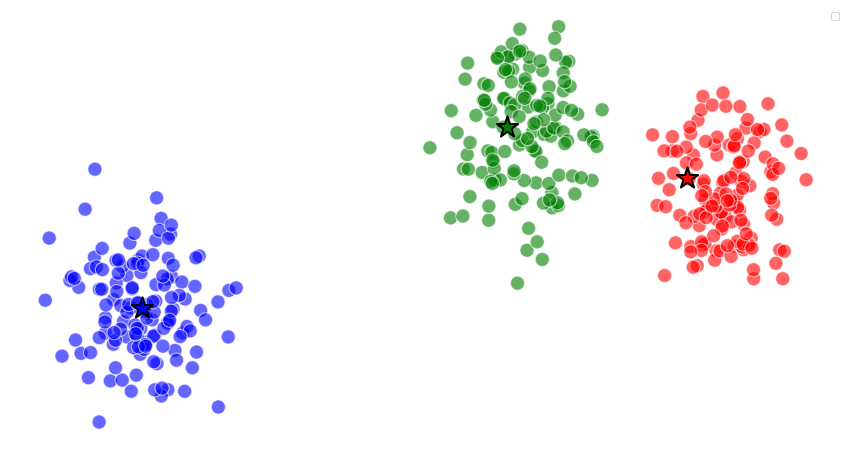

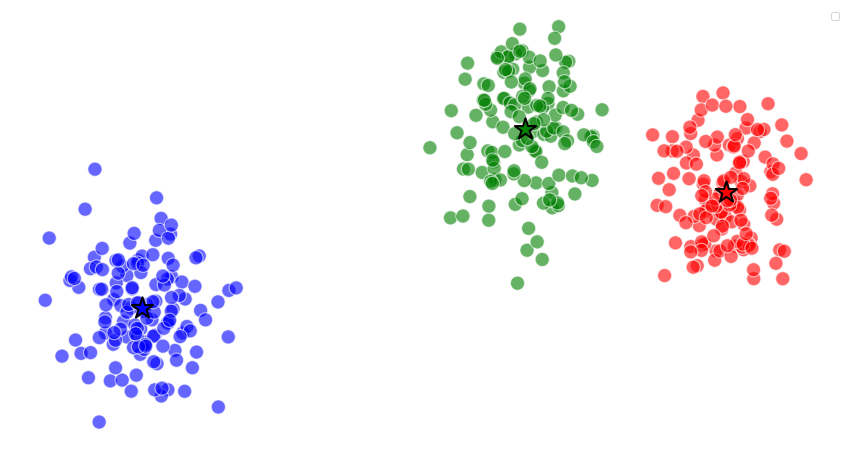

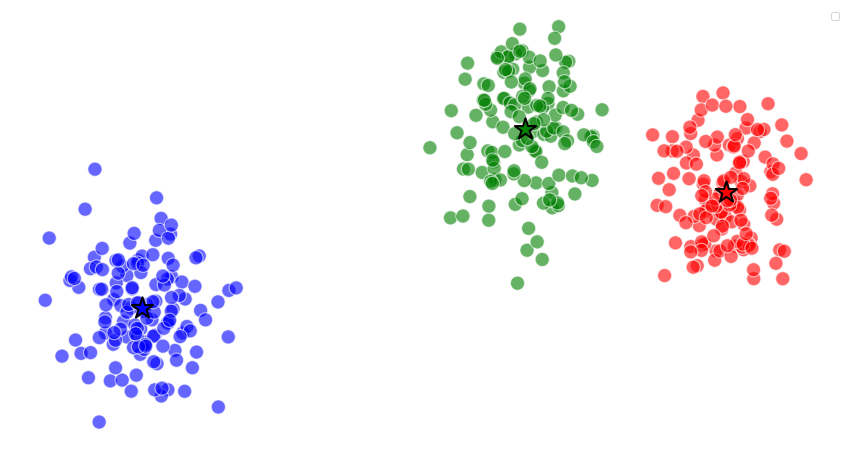

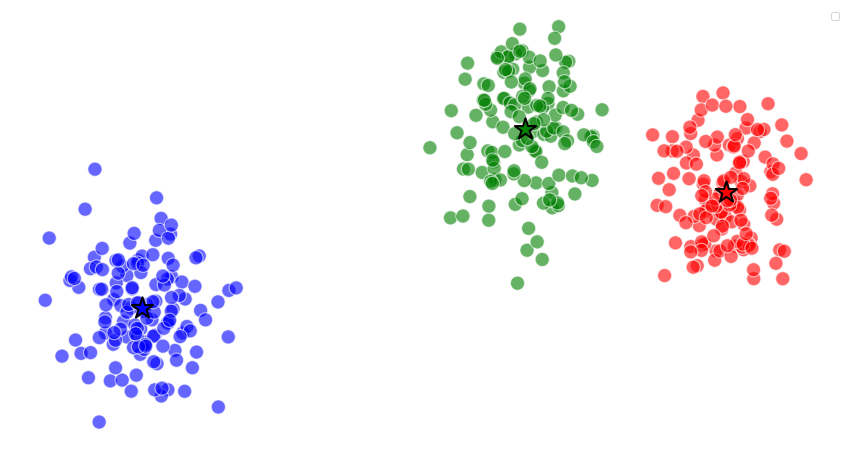

In [ ]:
for _ in range(10):
    if new_centroids == centroids:
        break

    else:
        centroids = new_centroids
        new_centroids = []
        euclidean_distance_func()
        move_centroids()

Now we need to find a way to get the optimal amount of clusters. This uses a WCSS value (Within Cluster Sum of Squares)

Calculating the wcss distance for different K values (ranges from 1 - 10)

In [ ]:
wcss_list = []

for n_cluster in range(1,10):
    centroid_init(data, n_cluster, figure=False)
    euclidean_distance_func(figure=False)
    move_centroids(figure=False)

    for _ in range(10):
        if new_centroids == centroids:
            break
        else:
            centroids = new_centroids
            new_centroids = []
            euclidean_distance_func(figure=False)
            move_centroids(figure=False)

    wcss = 0
    for i in np.unique(cluster):
        icluster = 0
        ddf = data[np.array(cluster) == i]
        for index in ddf.index:
            icluster += (euclidean_distance[index][cluster[index]]**2)

        wcss += icluster
    wcss_list.append(wcss)

Ploting the elbow curve

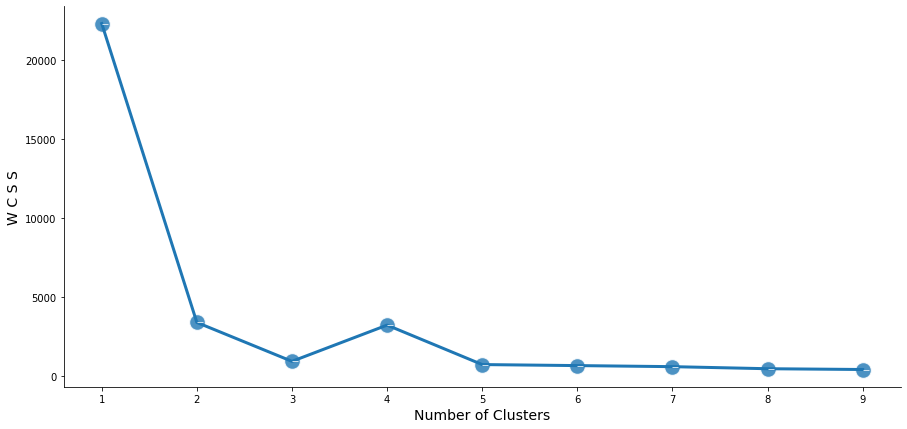

In [ ]:
x = [i for i in range(1,10)]

fig = plt.figure(figsize=(15,7))
sns.lineplot(x=x, y=wcss_list, marker=True, linewidth=3)
sns.scatterplot(x=x, y=wcss_list, s=250, alpha=0.8)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('W C S S', fontsize=14)
sns.despine()
plt.show()